# **1. Introduction**


This project utilizes data from The Movie Database (TMDB) to analyze factors influencing movie success and to predict future hits. Through data cleaning, exploratory analysis, and machine learning, we identify key determinants of revenue and profitability. Additionally, we develop a recommendation system to suggest films based on viewer preferences. Our findings aim to provide insights for industry stakeholders and enhance viewer experience.



# **2. Setup and Configuration**

In [1]:
!pip install pycaret

  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached ipython-8.22.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 640.0 kB/s eta 0:00:01
     ------------- ------------------------ 20.5/57.6 kB 640.0 kB/s eta 0:00:

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Eniac\.conda\envs\TMBD_\Lib\socket.py", line 706, in readinto

In [18]:
# Basic data manipulation and numerical operations
import pandas as pd
import numpy as np

# Utilities for handling complex data types
import ast
import json

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Model selection and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix,
                             roc_curve, auc)

# Machine learning models for classification and regression
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor

# Pipeline utilities
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Importing PyCaret's regression and classification modules for machine learning tasks
import pycaret

print("All libraries imported successfully!")


All libraries imported successfully!


# **3. Data Loading**

In [19]:
# Load movies dataset. This dataset contains details about various movies, including genres, budget, revenue, and more.
df_movies = pd.read_csv('tmdb_5000_movies.csv')

# Load credits dataset. This dataset provides cast and crew information for the movies.
df_credits = pd.read_csv('tmdb_5000_credits.csv')

In [20]:
print("Movies dataset shape:", df_movies.shape)
print("First few rows of movies dataset:")
df_movies.head()

Movies dataset shape: (4803, 20)
First few rows of movies dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
print("\nCredits dataset shape:", df_credits.shape)
print("First few rows of credits dataset:")
df_credits.head()


Credits dataset shape: (4803, 4)
First few rows of credits dataset:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **4. Data Overview**

In [22]:
# Displaying basic information about the movies dataset
print("Movies Dataset Information:")
df_movies.info()
print("\n")

# Displaying basic information about the credits dataset
print("Credits Dataset Information:")
df_credits.info()


Movies Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object

In [23]:
# Descriptive statistics for numerical features of the movies dataset
print("Movies Dataset Descriptive Statistics:")
df_movies.describe()


Movies Dataset Descriptive Statistics:


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [24]:
# Checking for missing values in the movies dataset
print("Missing Values in Movies Dataset:")
print(df_movies.isnull().sum())

Missing Values in Movies Dataset:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [25]:
# Checking for missing values in the credits dataset
print("Missing Values in Credits Dataset:")
df_credits.isnull().sum()

Missing Values in Credits Dataset:


movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [26]:
# Sample exploration of the 'genres' column in the movies dataset
print("Sample 'genres' data from Movies Dataset:")
df_movies['genres'][0]

Sample 'genres' data from Movies Dataset:


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
# Sample exploration of the 'cast' column in the credits dataset
print("Sample 'cast' data from Credits Dataset:")
df_credits['cast'][0][:200]

Sample 'cast' data from Credits Dataset:


'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_i'

In [28]:
# Counting unique values in each column of the movies dataset.
print("Unique values in each column of the Movies Dataset:")
print(df_movies.nunique())
print("\n")

# Counting unique values in each column of the credits dataset.
print("Unique values in each column of the Credits Dataset:")
print(df_credits.nunique())


Unique values in each column of the Movies Dataset:
budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64


Unique values in each column of the Credits Dataset:
movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64


# **5. Data Cleaning and Preprocessing**

In [29]:
# Copy movies dataset and merge crew, cast from credits
df_movies_copy = df_movies.copy()
df_movies_copy['crew'] = df_credits['crew']
df_movies_copy['cast'] = df_credits['cast']

print("done!")

done!


In [30]:
# Impute 0 values with the median of non-zero values for budget and revenue
budget_median = df_movies_copy[df_movies_copy['budget'] > 0]['budget'].median()
df_movies_copy['budget'] = df_movies_copy['budget'].replace(0, budget_median)

revenue_median = df_movies_copy[df_movies_copy['revenue'] > 0]['revenue'].median()
df_movies_copy['revenue'] = df_movies_copy['revenue'].replace(0, revenue_median)

print("done!")

done!


In [31]:
# Generate a list of unique languages from 'original_language'
language_list = list(df_movies_copy['original_language'].unique())

# Calculate frequency of each language and sort by frequency
language_frequency = df_movies_copy['original_language'].value_counts().sort_index(ascending=True)

# Map each language to its frequency rank
language_to_number = {language: rank for rank, language in enumerate(language_frequency.index, start=1)}

# Encode original languages to their corresponding ranks for analysis
df_movies_copy['original_language_encoded'] = df_movies_copy['original_language'].map(language_to_number)

# Display the first few rows to verify encoding
df_movies_copy[['original_language', 'original_language_encoded']].head()


,original_language,original_language_encoded
0,en,8
1,en,8
2,en,8
3,en,8
4,en,8


In [32]:
# Convert 'release_date' to datetime format and extract the 'year'
df_movies_copy['release_date'] = pd.to_datetime(df_movies_copy['release_date'])
df_movies_copy['year'] = df_movies_copy['release_date'].dt.year

# Display the first few rows to verify the conversion and extraction
df_movies_copy[['release_date', 'year']].head()


,release_date,year
0,2009-12-10,2009.0
1,2007-05-19,2007.0
2,2015-10-26,2015.0
3,2012-07-16,2012.0
4,2012-03-07,2012.0


In [33]:
# Compact DataFrame preparation for analysis and modeling
df_final = df_movies_copy[[
        'id', 'budget', 'popularity', 'vote_count', 'vote_average', 'year',
        'runtime', 'original_language_encoded', 'revenue'
        ]].copy()

df_final['revenue_percent'] = ((df_final['revenue'] - df_final['budget']) / df_final['budget']).replace(np.inf, np.nan) * 100
df_final['profitable'] = (df_final['revenue'] > df_final['budget']).astype(int)
df_final[['budget_scaled (M$)', 'revenue_scaled (M$)']] = df_final[['budget', 'revenue']] / 1e6
df_ML = df_final[['popularity', 'vote_count', 'vote_average', 'budget_scaled (M$)',
                  'revenue_scaled (M$)', 'profitable']]

df_final.head(4)


,id,budget,popularity,vote_count,vote_average,year,runtime,original_language_encoded,revenue,revenue_percent,profitable,budget_scaled (M$),revenue_scaled (M$)
0,19995,237000000,150.437577,11800,7.2,2009.0,162.0,8,2787965087,1076.356577,1,237.0,2787.965087
1,285,300000000,139.082615,4500,6.9,2007.0,169.0,8,961000000,220.333333,1,300.0,961.000000
2,206647,245000000,107.376788,4466,6.3,2015.0,148.0,8,880674609,259.459024,1,245.0,880.674609
3,49026,250000000,112.312950,9106,7.6,2012.0,165.0,8,1084939099,333.975640,1,250.0,1084.939099


In [34]:

# Identify numerical and categorical columns
numerical_cols = df_ML.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_ML.select_dtypes(include=['object', 'bool']).columns

# Define preprocessing for numerical columns: impute missing values with median and scale data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns: impute missing values with the most frequent value and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessing to df_ML

df_ML_preprocessed = pd.DataFrame(preprocessor.fit_transform(df_ML))


In [35]:
df_ML

,popularity,vote_count,vote_average,budget_scaled (M$),revenue_scaled (M$),profitable
0,150.437577,11800,7.2,237.000,2787.965087,1
1,139.082615,4500,6.9,300.000,961.000000,1
2,107.376788,4466,6.3,245.000,880.674609,1
3,112.312950,9106,7.6,250.000,1084.939099,1
4,43.926995,2124,6.1,260.000,284.139100,1
...,...,...,...,...,...,...
4798,14.269792,238,6.6,0.220,2.040920,1
4799,0.642552,5,5.9,0.009,51.751835,1
4800,1.444476,6,7.0,23.000,51.751835,1
4801,0.857008,7,5.7,23.000,51.751835,1


In [36]:
df_ML_preprocessed.columns = df_ML.columns

In [37]:
df_ML_preprocessed['revenue_scaled (M$)'] = df_ML['revenue_scaled (M$)']
df_ML_preprocessed['profitable'] = df_ML['profitable']

# **6. Data Visualization**

## **Distribution of Movie Budgets**

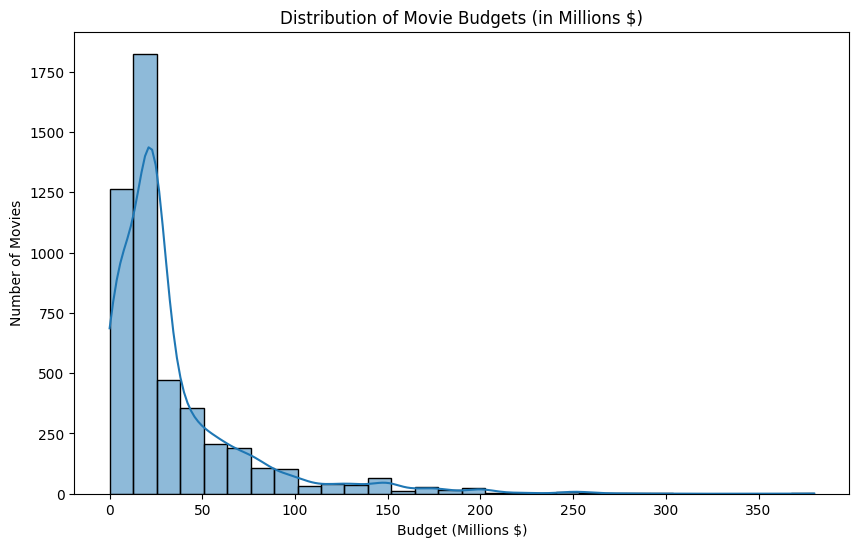

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['budget_scaled (M$)'], kde=True, bins=30)
plt.title('Distribution of Movie Budgets (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Number of Movies')
plt.show()


## **Movie Popularity vs. Revenue**

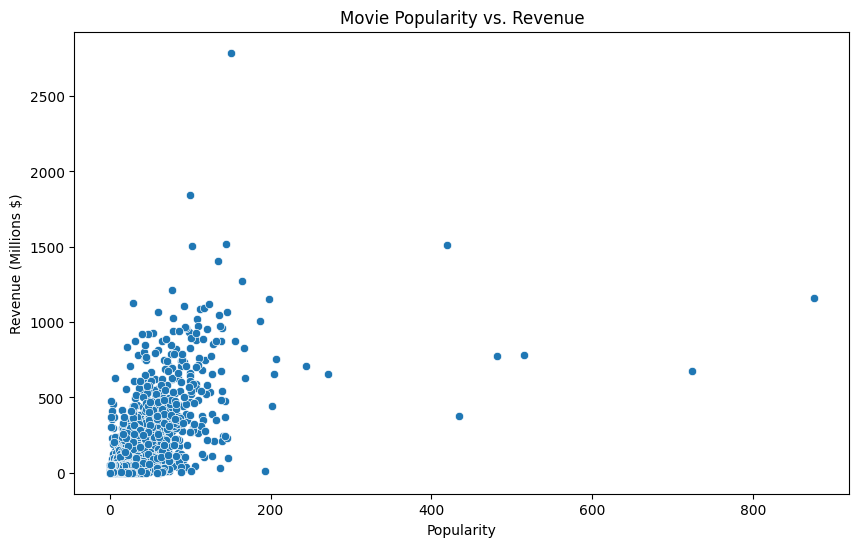

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue_scaled (M$)', data=df_final)
plt.title('Movie Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (Millions $)')
plt.show()


## **Vote Average vs. Revenue**

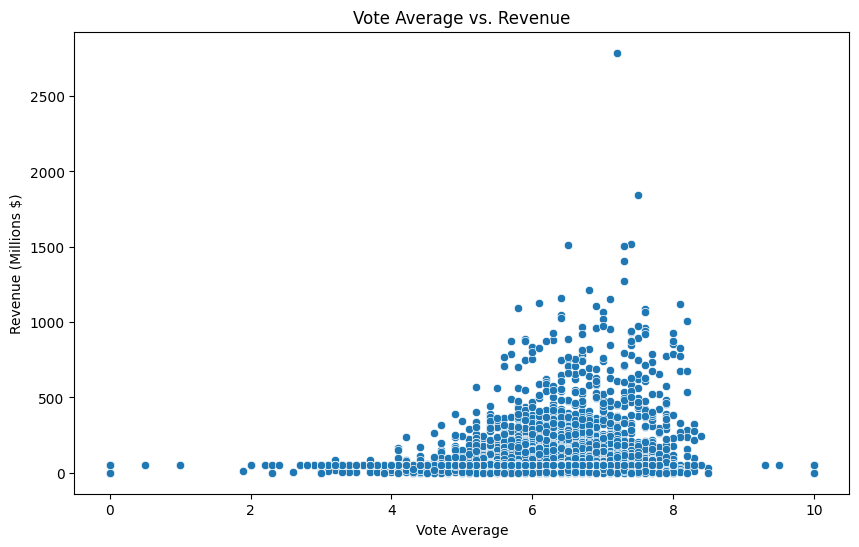

In [40]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='revenue_scaled (M$)', data=df_final)
plt.title('Vote Average vs. Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (Millions $)')
plt.show()

## **Yearly Movie Release Trend**

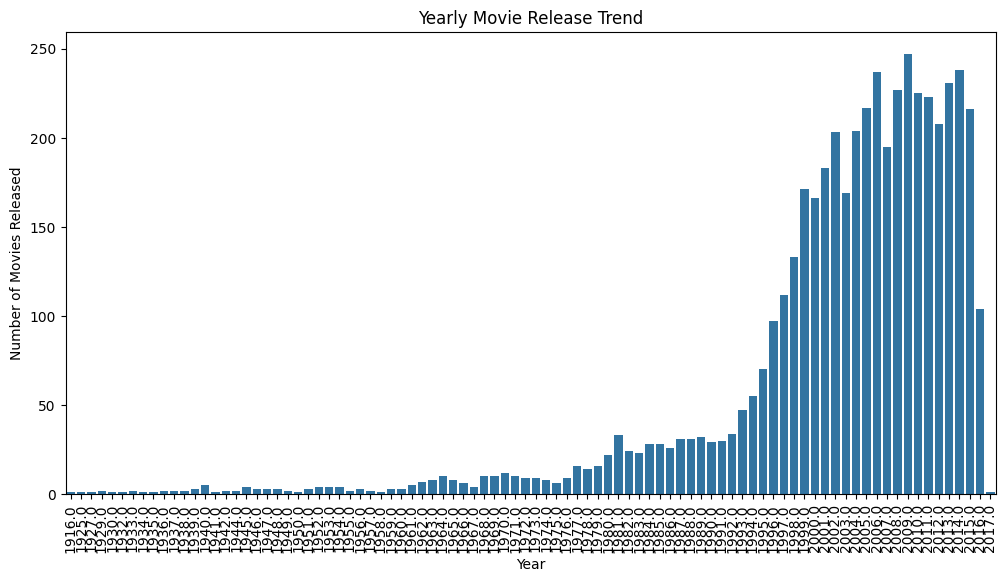

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_final)
plt.title('Yearly Movie Release Trend')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=90)
plt.show()

## **Profitability of Movies**

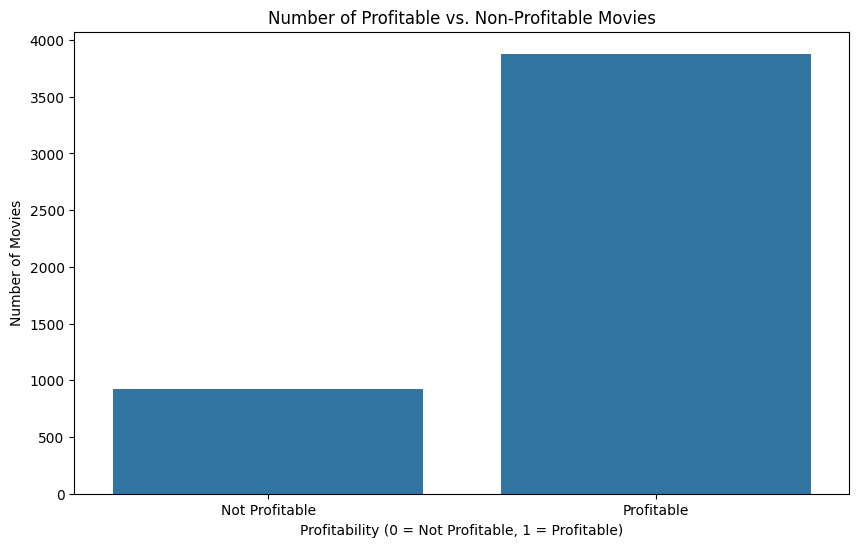

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='profitable', data=df_final)
plt.title('Number of Profitable vs. Non-Profitable Movies')
plt.xlabel('Profitability (0 = Not Profitable, 1 = Profitable)')
plt.ylabel('Number of Movies')
plt.xticks([0, 1], ['Not Profitable', 'Profitable'])
plt.show()


## **Revenue vs. Budget for Profitable Movies**


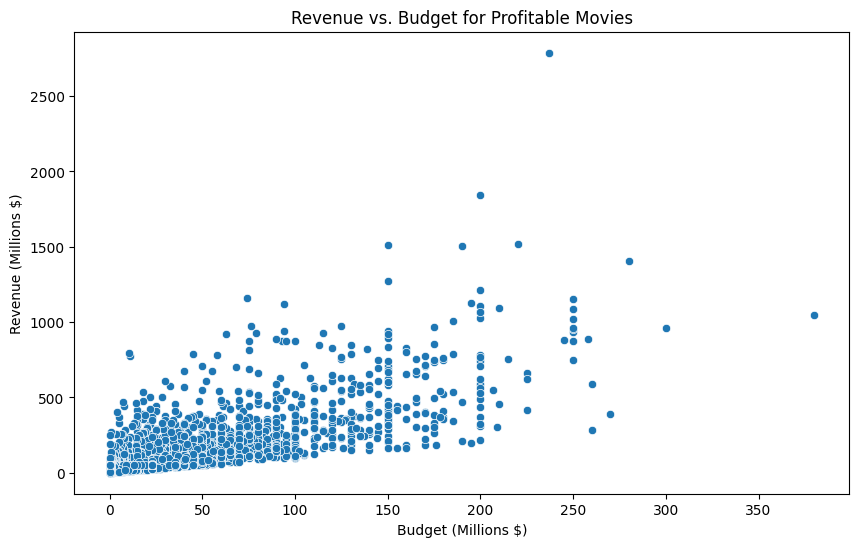

In [43]:
profitable_movies = df_final[df_final['profitable'] == 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_scaled (M$)', y='revenue_scaled (M$)', data=profitable_movies)
plt.title('Revenue vs. Budget for Profitable Movies')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.show()


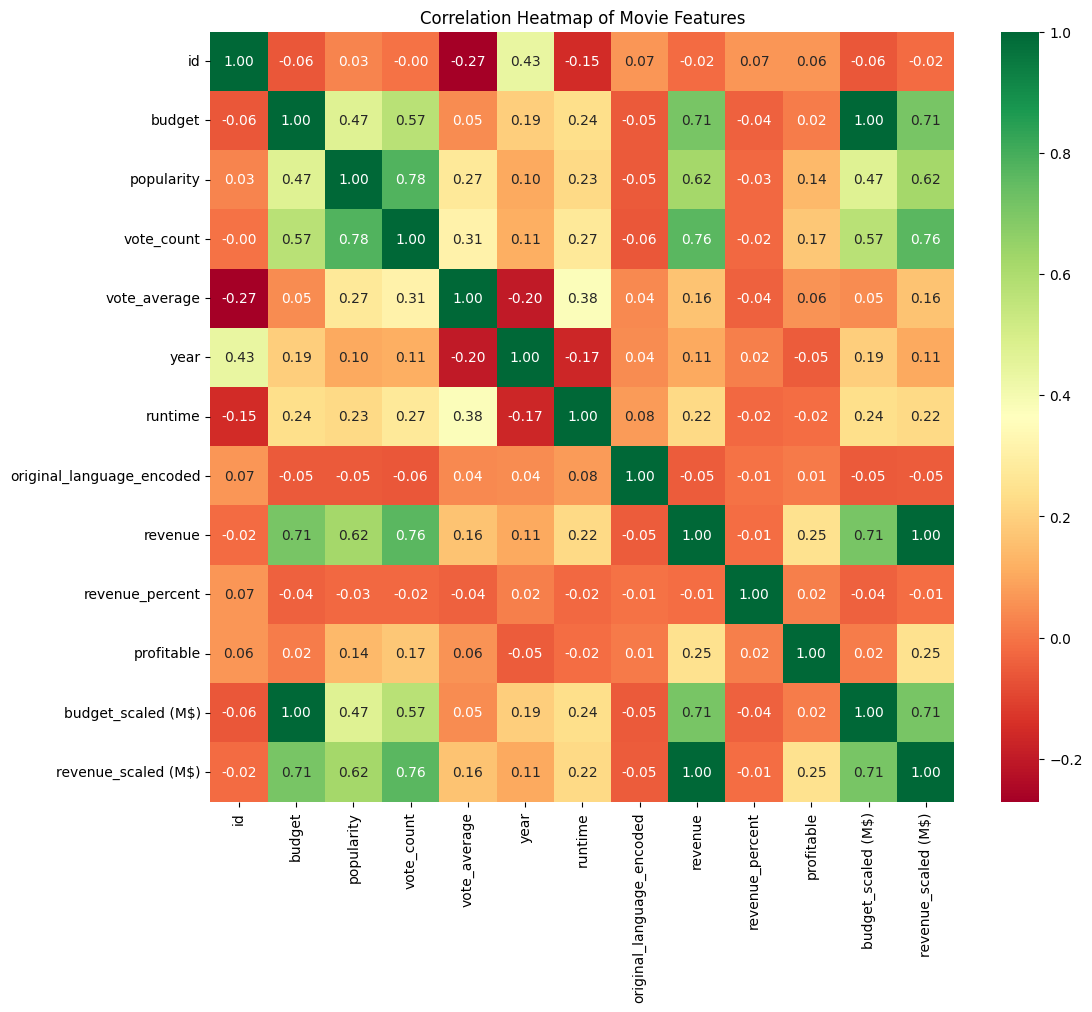

In [44]:
# Calculating correlation matrix
corr = df_final.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Correlation Heatmap of Movie Features')
plt.show()


The heatmap displays the correlation coefficients between several variables related to movies. The coefficients range from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

Key Observations:

Budget and Revenue: There is a strong positive correlation (0.71) between the budget and revenue, suggesting that movies with higher budgets tend to generate higher revenues.
Popularity, Vote Count, and Revenue: Both popularity and vote count are highly correlated with revenue (0.62 and 0.76, respectively), indicating that more popular movies and those with a higher number of votes tend to have greater revenues.
Budget and Vote Count: There is a moderate positive correlation (0.57) between budget and vote count, which may imply that bigger budget films attract more viewers and thus more votes.
Vote Average: Interestingly, the vote average has low to no significant correlation with many of the variables, including budget (0.05) and revenue (0.16), suggesting that the average rating a movie receives is not strongly dependent on its budget or its revenue.
Profitable: The variable 'profitable' has low correlation coefficients with all other features, suggesting that profitability may not be directly predictable through any single feature alone.
Scaled Features:

Scaled versions of budget and revenue (budget_scaled (M$) and revenue_scaled (M$)) show identical correlation patterns to their non-scaled counterparts, which is expected as scaling does not change the nature of the relationship between variables.
Overall, the heatmap indicates that financial and popularity factors such as budget, popularity, and vote count are significant predictors of a movie’s financial success, while critical reception (vote average) and profitability have more complex relationships with the other features that may require further investigation.

# **7. Machine Learning**

## **Regression**

### **Data Preparation**

In [45]:
# Specify the dataset and the target variable
X1 = df_ML_preprocessed.drop(columns=['revenue_scaled (M$)', 'profitable'])
y1 = df_ML_preprocessed['revenue_scaled (M$)']
df = X1.join(y1)  # Combine features and target for PyCaret

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

### **PyCaret Setup and Model Comparison**

In [46]:
from pycaret.regression import *

# Assuming df is already defined and includes the 'revenue_scaled (M$)' column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('revenue_scaled (M$)')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Correct PyCaret Setup for Regression
s = setup(data=df, target='revenue_scaled (M$)', session_id=123,
          numeric_features=list(numerical_cols), categorical_features=list(categorical_cols),
          preprocess=True)

# Compare models for the best one based on default regression metrics (like R-squared)
best_model = compare_models()

print(best_model)


,Description,Value
0,Session id,123
1,Target,revenue_scaled (M$)
2,Target type,Regression
3,Original data shape,"(4803, 5)"
4,Transformed data shape,"(4803, 5)"
5,Transformed train set shape,"(3362, 5)"
6,Transformed test set shape,"(1441, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,48.0836,7633.4370,85.9942,0.7035,1.1060,3459.6427,0.0770
llar,Lasso Least Angle Regression,48.0837,7633.5396,85.9947,0.7035,1.1061,3459.8349,0.0520
lr,Linear Regression,48.0771,7646.3070,86.1023,0.7026,1.1029,3557.2523,1.0570
ridge,Ridge Regression,48.0754,7646.2595,86.1009,0.7026,1.1028,3556.3937,0.0720
lar,Least Angle Regression,48.0771,7646.3075,86.1023,0.7026,1.1029,3557.2514,0.0520
br,Bayesian Ridge,48.0733,7646.3582,86.1000,0.7026,1.1026,3555.2646,0.0420
huber,Huber Regressor,46.1329,8157.1417,88.9214,0.6868,1.0395,4366.1137,0.0660
rf,Random Forest Regressor,45.7511,8050.6516,88.5118,0.6858,1.0621,8530.7356,1.8190
gbr,Gradient Boosting Regressor,45.6127,8051.5146,88.7689,0.6828,1.0658,9296.2552,0.3490
lightgbm,Light Gradient Boosting Machine,46.4218,8238.0155,89.2063,0.6803,1.0591,9769.2092,0.2040


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Lasso(random_state=123)


In a regression model comparison using PyCaret, the Gradient Boosting Regressor emerged as the best model with an R-squared of 0.6828. The Random Forest and Huber Regressors followed closely in performance. Models were evaluated on metrics such as RMSE and R-squared, with lower RMSE and higher R-squared indicating better performance. The comparison suggests focusing on the Gradient Boosting Regressor for further model optimization.

### **Training the Models**

In [47]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train1, y_train1.values.ravel())  # Fit the Linear Regression model

# Train a Lasso Regression model
lasso = Lasso()
lasso.fit(X_train1, y_train1.values.ravel())  # Fit the Lasso Regression model


Lasso()

### **Predictions**

In [49]:
# Make predictions with Linear Regression
predictions_lr = lr.predict(X_test1)

# Make predictions with lasso Regression
predictions_lasso = lasso.predict(X_test1)

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:\nMAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}\n")

# Print metrics for both Linear Regression and Ridge Regression
print_metrics(y_test1, predictions_lr, 'Linear Regression')
print_metrics(y_test1, predictions_lasso, 'Lasso Regression')

Linear Regression Metrics:
MAE: 50.2081, MSE: 8366.7303, RMSE: 91.4698, R^2: 0.6734

Lasso Regression Metrics:
MAE: 49.9437, MSE: 8345.9709, RMSE: 91.3563, R^2: 0.6742



### **Evaluate**

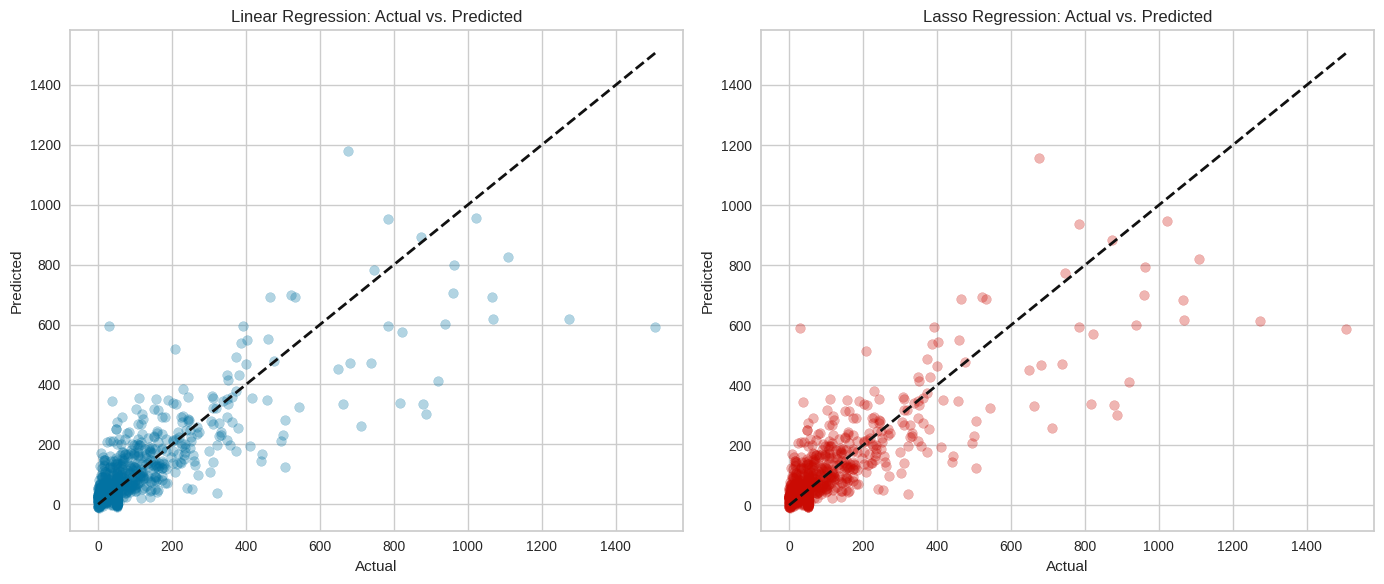

In [51]:
# Plotting the results for comparison
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test1, predictions_lr, alpha=0.3)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test1, predictions_lasso, alpha=0.3, color='r')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.title('Lasso Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


## **Classification**

### **Data Preparation**

In [52]:
# Prepare dataset for classification
X2 = df_ML_preprocessed.drop(columns=['revenue_scaled (M$)', 'profitable'])
y2 = df_ML_preprocessed['profitable']
df = X2.join(y2)  # Combine features and target for PyCaret usage

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)


### **PyCaret Setup and Model Comparison**

In [53]:
from pycaret.classification import *

clf1 = setup(data=df, target='profitable', session_id=123, preprocess=True)
best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,profitable
2,Target type,Binary
3,Original data shape,"(4803, 5)"
4,Transformed data shape,"(4803, 5)"
5,Transformed train set shape,"(3362, 5)"
6,Transformed test set shape,"(1441, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7719,0.9694,0.8358,0.8977,0.2284,0.2750,0.4460
rf,Random Forest Classifier,0.8186,0.7522,0.9481,0.8460,0.8941,0.2753,0.2994,0.6190
ada,Ada Boost Classifier,0.8168,0.7521,0.9809,0.8253,0.8963,0.1548,0.2193,0.1900
et,Extra Trees Classifier,0.8111,0.7453,0.9433,0.8420,0.8897,0.2460,0.2674,0.3800
lr,Logistic Regression,0.8084,0.6956,0.9956,0.8105,0.8936,0.0293,0.0760,0.0390
xgboost,Extreme Gradient Boosting,0.8082,0.7447,0.9344,0.8446,0.8872,0.2559,0.2718,0.1000
lightgbm,Light Gradient Boosting Machine,0.8082,0.7526,0.9396,0.8414,0.8878,0.2409,0.2606,0.2530
ridge,Ridge Classifier,0.8076,0.0000,1.0000,0.8076,0.8935,0.0000,0.0000,0.0500
dummy,Dummy Classifier,0.8076,0.5000,1.0000,0.8076,0.8935,0.0000,0.0000,0.0320
lda,Linear Discriminant Analysis,0.8073,0.6720,0.9996,0.8075,0.8933,-0.0006,-0.0027,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Using PyCaret's classification module, various models were evaluated to predict profitability. The Gradient Boosting Classifier showed the highest Accuracy (0.8215) and AUC (0.9694), indicating strong predictive capabilities. The Random Forest Classifier was a close second in performance. The highlighted models outperformed basic classifiers like Dummy Classifier, signifying the effectiveness of more complex algorithms in this context. The results suggest employing the Gradient Boosting Classifier for reliable profitability predictions.

### **Training**

In [54]:
models2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define a function to train, evaluate, and plot model performance
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, ax):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'{model_name}')

### **Evaluate**

Logistic Regression:
  Accuracy: 0.8044, Precision: 0.7778, Recall: 0.8044, F1 Score: 0.7230

Decision Tree:
  Accuracy: 0.7565, Precision: 0.7555, Recall: 0.7565, F1 Score: 0.7560

Random Forest:
  Accuracy: 0.8096, Precision: 0.7778, Recall: 0.8096, F1 Score: 0.7801

XGBoost:
  Accuracy: 0.8075, Precision: 0.7761, Recall: 0.8075, F1 Score: 0.7802



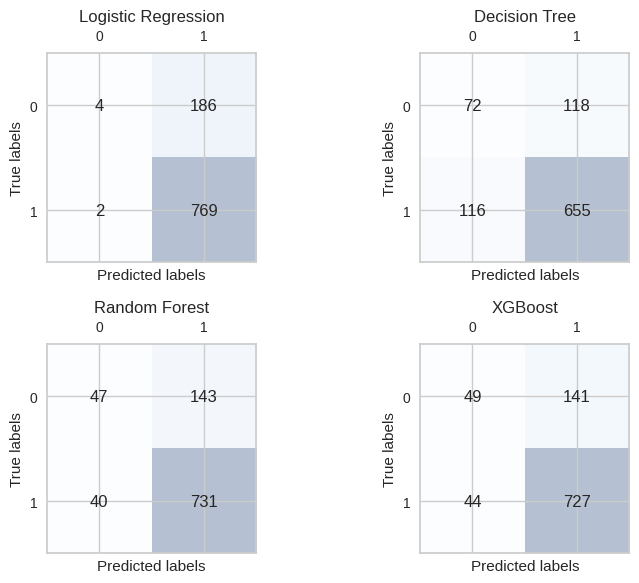

In [55]:
# Training, Evaluating, and Plotting Model Performance
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for ax, (name, model) in zip(axs.flatten(), models2.items()):
    train_evaluate_model(model, X_train2, y_train2, X_test2, y_test2, name, ax)

plt.tight_layout()
plt.show()


# **8. Recommendation**

In our recommendation system, we use an array of features including genres, keywords, production countries, production companies, titles, overviews, taglines, and cast and crew details. We process these attributes to fill in missing data and then merge them into a singular feature set. This combined data is vectorized using TF-IDF to understand the importance of words across documents. We then employ cosine similarity to identify movies with the most similar profiles, providing users with tailored recommendations based on their inputs.

In [56]:

# Define the columns to copy and fill missing values with an empty string
columns = [
    'genres', 'keywords', 'production_countries', 'production_companies',
    'original_title', 'overview', 'tagline', 'crew', 'cast'
]

# Create a new DataFrame, copy the specified columns, and fill missing values
df = df_movies_copy[columns].fillna('')

# Combine the specified columns into a single feature for vectorization
df['combined_features'] = df.apply(lambda row: ' '.join(row[col] for col in columns), axis=1)

# Initialize TF-IDF Vectorizer, fit and transform combined_features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(user_input, df=df, tfidf=tfidf):
    # Transform user input and calculate cosine similarity
    user_vec = tfidf.transform([user_input])
    cosine_sim_input = cosine_similarity(user_vec, tfidf_matrix)

    # Get top 10 similar items excluding the first exact match
    sim_scores = sorted(list(enumerate(cosine_sim_input[0])), key=lambda x: x[1], reverse=True)[1:11]

    # Extract the indices of top matches and their details
    indices = [i[0] for i in sim_scores]
    recommendations = df.iloc[indices][['original_title']].merge(df_movies[['original_title', 'vote_average']], on='original_title').sort_values('vote_average', ascending=False)

    return recommendations

print(get_recommendations('a man with a horse'))


                  original_title  vote_average
5             The Black Stallion           7.0
7                    Hross í oss           6.9
3                 The Full Monty           6.8
9       The Man from Snowy River           6.8
6                         Flicka           6.1
0                     Horse Camp           5.5
4                    A Fine Step           4.1
1               Naturally Native           0.0
2                Running Forever           0.0
8  The Ballad of Gregorio Cortez           0.0


# **9. Conclusion**


In summary, our comprehensive analysis of the TMDB movie dataset, which included a detailed examination of financials, genres, production details, and linguistic elements, has culminated in robust predictive models and an innovative recommendation system. The regression models, particularly the Linear and Lasso Regressions, demonstrated substantial predictive accuracy with R-squared values above 0.67, indicating that a significant portion of revenue variance can be explained by our features.

For classification, our models aimed to predict the profitability of movies with noteworthy precision. The Random Forest and XGBoost models exhibited superior performance, with accuracy rates exceeding 80%. These models showcased their effectiveness in discerning profitable ventures within the cinematic domain.

Moreover, our recommendation system, built on a multitude of movie features, employed TF-IDF Vectorization and cosine similarity to successfully suggest movies. This system represents a significant stride towards personalized user experiences, underscoring the synergy between data-driven insights and user engagement.

The project's outcomes not only reflect the power of machine learning in the context of film industry analytics but also establish a foundation for future explorations into predictive modeling and content recommendation.

In [2]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
